In [1]:
import pandas as pd
df = pd.read_csv('https://bit.ly/wine_csv_data')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [3]:
df.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [4]:
data = df[['alcohol', 'sugar', 'pH']]
target = df['class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, stratify=target, random_state=0
)

In [5]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

0.9971264367816092
0.8504615384615385


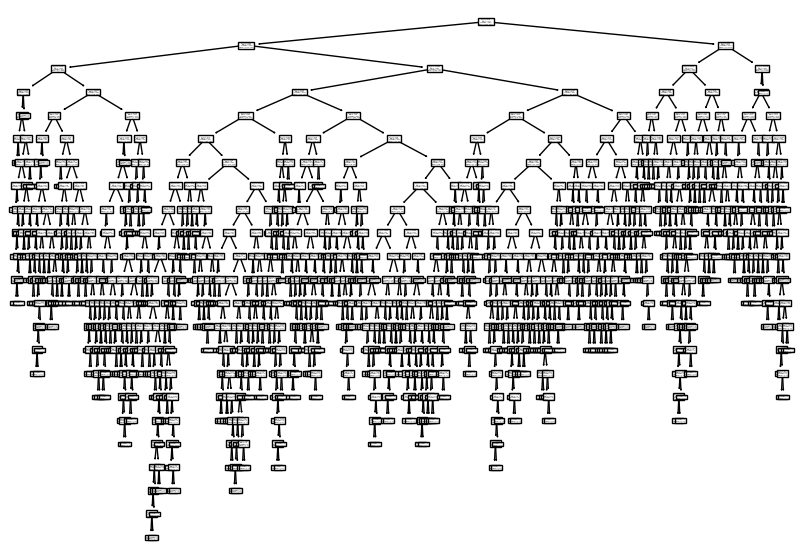

In [7]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 7))
plot_tree(tree)
plt.show()

In [10]:
df.columns

Index(['alcohol', 'sugar', 'pH', 'class'], dtype='object')

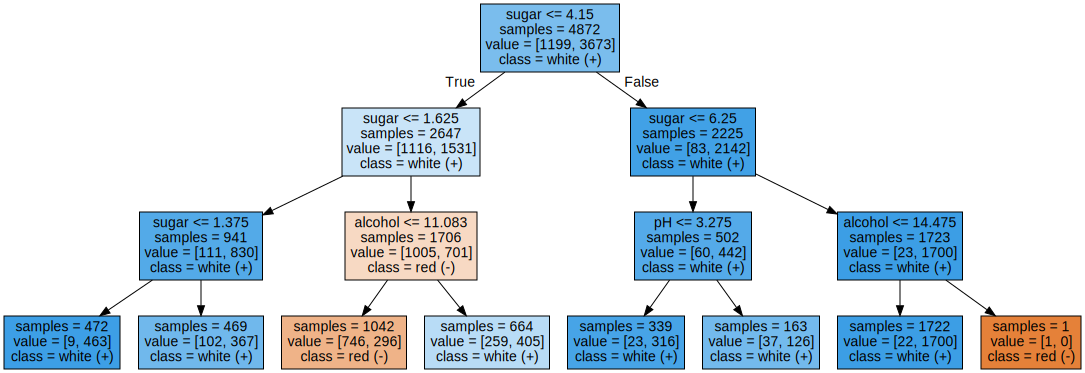

In [15]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)

from sklearn.tree import export_graphviz
import graphviz
export_graphviz(tree, out_file="tree3.dot", class_names=["red (-)", "white (+)"],
                feature_names=df.drop(columns='class').columns, impurity=False, filled=True)

with open("tree3.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## Cheat sheet

In [1]:
from imblearn.over_sampling     import SMOTENC
from imblearn.pipeline          import Pipeline
from sklearn.decomposition      import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors          import KNeighborsClassifier
from sklearn.pipeline           import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydot
import shap, mglearn, random
import xgboost as xgb

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


ModuleNotFoundError: No module named 'imageio'

In [ ]:
tree = DecisionTreeClassifier(max_depth=None, min_samples_split=2,
    min_samples_leaf=1, max_leaf_nodes=None, random_state=0)
tree.fit(X_train, y_train)

export_graphviz(tree, out_file="output.dot", class_names=["red (-)", "white (+)"],
    feature_names=df.drop(columns='class').columns, impurity=False, filled=True)
with open("output.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


n_features = random.choice(*range(1, X_train.shape[1]))
forest = RandomForestClassifier(n_estimators=100, max_features=n_features, random_state=0)

gbrt = GradientBoostingClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, random_state=0)
gbrt.fit(X_train, y_train)

model = random.choice(tree, forest, gbrt)
n_features = len(df.columns) - 1
plt.barh(np.arange(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(n_features), df.drop(columns='class').columns)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.ylim(-1, n_features)

xgb_model = xgb.XGBClassifier(max_depth=3, learning_rate=0.1, random_state=0)
xgb_model.fit(X_train, y_train)


ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
tp, fn, fp, tn = confusion_matrix(
    y_test, forest.predict(X_test), labels=forest.classes_).ravel()

precision, recall = tp / (tp+fp), tp / (tp+fn)
pd.options.display.float_format = '{:.3%}'.format
display(pd.DataFrame({
    'name': ['Accuracy', 'Precision(PPV)', 'Recall(TPR)', 'F1-Score', 'FPR(Type I Error)', 'Type II Error'],
    'value': [(tp+tn) / (tp+tn+fp+fn), precision, recall, 2 * (precision*recall) / (precision+recall),
        fp / (fp+tn), fn / (tp+fn)]
}))
print(classification_report(y_test, model.predict(X_test), target_names=["Pos", "Neg"]))


fig, ax = plt.subplots()
PrecisionRecallDisplay.from_estimator(tree, X_test, y_test, ax=ax)
PrecisionRecallDisplay.from_estimator(forest, X_test, y_test, ax=ax)
plt.show()

print("Decision function:", gbrt.decision_function(X_test))
print("Predictions:\n", gbrt.predict(X_test))
print("Predicted probabilities:")
print(gbrt.predict_proba(X_test))

scoring = random.choice('accuracy', 'roc_auc', 'precision', 'recall', 'f1')
kfold = random.choice(KFold(), StratifiedKFold())
ss = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
print(cross_val_score(model, data, target, cv=random.choice(kfold, ss), scoring=scoring))

param_grid = {'param': []}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, scoring=scoring, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Optimal Parameters:", grid_search.best_params_)
model = grid_search.best_estimator_
print(f"Best Cross Validation Score: {grid_search.best_score_:.2f}")


pipe = Pipeline([("smotenc", SMOTENC(categorical_features=[0])),
                 ('pca', PCA(n_components=6)),
                 ('tree', DecisionTreeClassifier())])
param_grid = {'name__param': []}
grid_search.fit(X_train, y_train) or pipe.fit(X_train, y_train)


explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:], matplotlib=True) #about data point 0 
